In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from troika import troika

In [5]:
def plot_graph(graph, coms=[], k=5, plot_size=(7,7), plot_title="", node_size=900, font_size=20, edge_display_mode=1, eps_filename="") -> None:
    """
    Helper function to plot out the communities within the graph in different colours
    """
    plt.figure(figsize=plot_size)
    pos = nx.spring_layout(graph, k=k, seed=1)
    if coms:
        community_map = {node: i for i, community in enumerate(coms) for node in community}
        colors = [community_map[node] for node in graph.nodes()]
        cmap = plt.cm.cool
        nx.draw_networkx_nodes(graph, pos, node_color=colors, cmap=cmap, node_size=node_size)
    else:
        nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color="orange")
    
    if edge_display_mode == 1:
        edge_labels = nx.get_edge_attributes(graph, 'weight')
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=font_size)
        nx.draw_networkx_edges(graph, pos, alpha=0.5)
    elif edge_display_mode == 2:
        edges = graph.edges(data=True)
        positive_edges = [(u, v) for u, v, d in edges if d['weight'] > 0]
        negative_edges = [(u, v) for u, v, d in edges if d['weight'] < 0]
        nx.draw_networkx_edges(graph, pos, edgelist=positive_edges, edge_color='blue', alpha=0.5)
        nx.draw_networkx_edges(graph, pos, edgelist=negative_edges, edge_color='red', alpha=0.5)
    else:
        nx.draw_networkx_edges(graph, pos, alpha=0.5)

    nx.draw_networkx_labels(graph, pos, font_size=font_size)
    plt.axis('off')
    if plot_title:
        plt.title(plot_title)
    if eps_filename:
        plt.savefig(eps_filename, format='eps', bbox_inches='tight', pad_inches=0)
    plt.show()


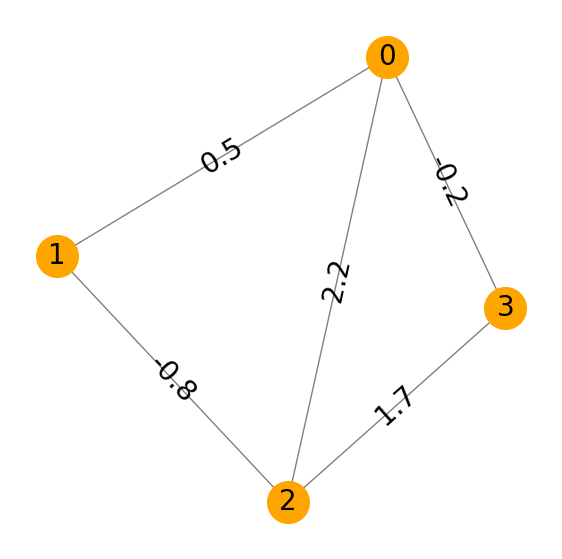

In [18]:
# Create or load your networkx (undirected and weighted) graph 
graph = nx.Graph([
    (0, 1, {'weight': 0.5}),
    (0, 2, {'weight': 2.2}),
    (0, 3, {'weight': -0.2}),
    (1, 2, {'weight': -0.8}),
    (2, 3, {'weight': 1.7})])

plot_graph(graph, plot_size=(7,7), edge_display_mode=1)

In [19]:
# Run the Troika algorithm
cp_objective_value, optimality_gap, partition, modeling_time, solve_time = troika(graph, global_threshold=0.001, time_allowed=60)

print('objective value', float(cp_objective_value))
print('solve time', float(solve_time))
print('partition', partition)

initial lower bound 3.7
initial upper bound estimate 3.7
objective value 3.7
solve time 0.0018956661224365234
partition [[0, 2, 3], [1]]


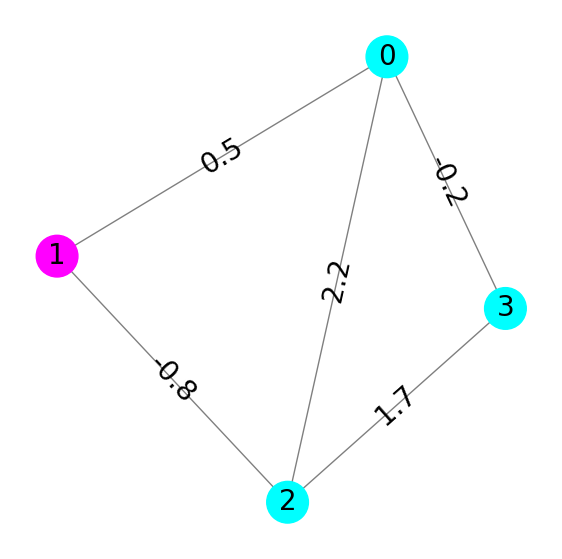

In [ ]:
# Plot out graph with coloured communities
plot_graph(graph, partition, plot_size=(7,7), edge_display_mode=1)

In [ ]:
# Load a benchmark instance
G = nx.read_gml("corr40-7.gml")

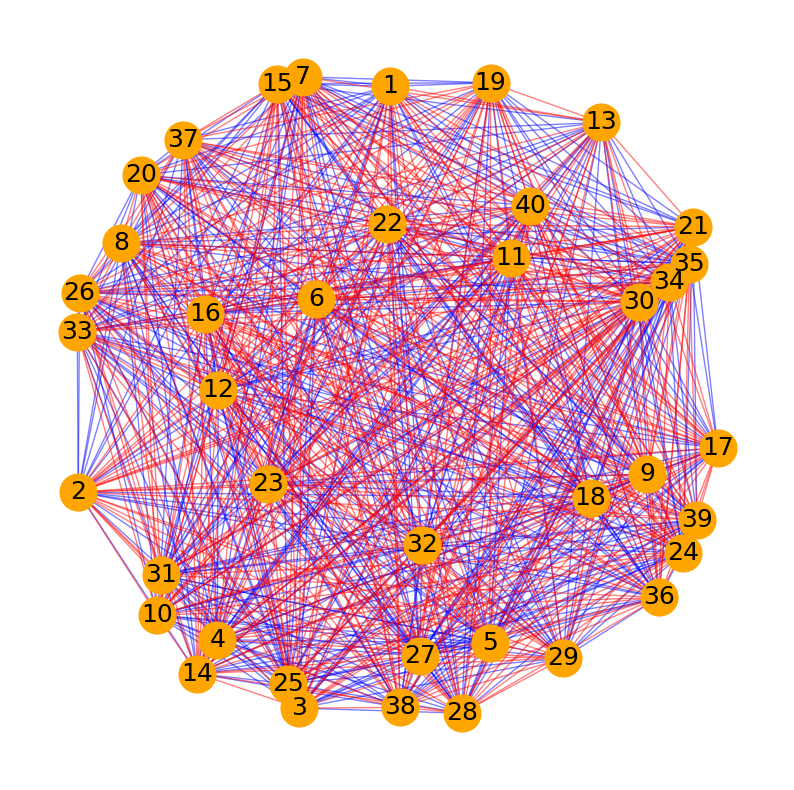

In [28]:
plot_graph(G, plot_size=(10,10), node_size=700, font_size=18, edge_display_mode=2)

In [ ]:
# Run the Troika algorithm on benchmark instance
cp_objective_value, optimality_gap, partition, modeling_time, solve_time = troika(G, global_threshold=0.01, time_allowed=60)

print('objective value', float(cp_objective_value))
print('solve time', float(solve_time))
print('partition', partition)

initial lower bound 2254
initial upper bound estimate 2773.0
initial lp upper bound 2432.0
==============================================LEVEL:  1 ==============================================
======== BRANCHING ON (np.int64(4), np.int64(27), np.int64(33)) ========
Bounds 2294 2431.0
==============================================LEVEL:  2 ==============================================
======== BRANCHING ON (np.int64(4), np.int64(10), np.int64(29)) ========
======== BRANCHING ON (np.int64(16), np.int64(17), np.int64(30)) ========
Bounds 2294 2427.0
==============================================LEVEL:  3 ==============================================
======== BRANCHING ON (np.int64(21), np.int64(24), np.int64(26)) ========
======== BRANCHING ON (np.int64(6), np.int64(11), np.int64(15)) ========
======== BRANCHING ON (np.int64(16), np.int64(26), np.int64(39)) ========
Bounds 2294 2426.0
==============================================LEVEL:  4 ==============================================

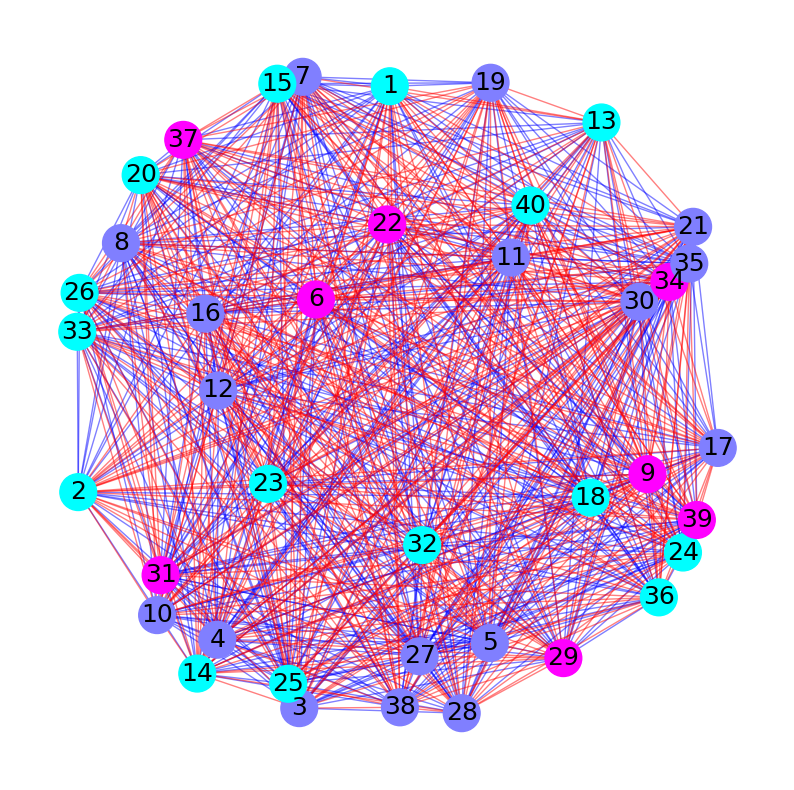

In [ ]:
# Plot out graph with coloured communities
plot_graph(graph, partition, plot_size=(10,10), node_size=700, font_size=18, edge_display_mode=2)